Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0030 - mae: 0.0382 - val_loss: 0.0019 - val_mae: 0.0347
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0019 - mae: 0.0347 - val_loss: 0.0020 - val_mae: 0.0349
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0019 - mae: 0.0350 - val_loss: 0.0020 - val_mae: 0.0355
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0020 - val_mae: 0.0346
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0019 - mae: 0.0347 - val_loss: 0.0019 - val_mae: 0.0344
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0019 - val_mae: 0.0344
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0019 - mae: 0.0348 - val_loss: 0.0019 - val_mae: 0.0346
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0019 - val_mae: 0.0347
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━

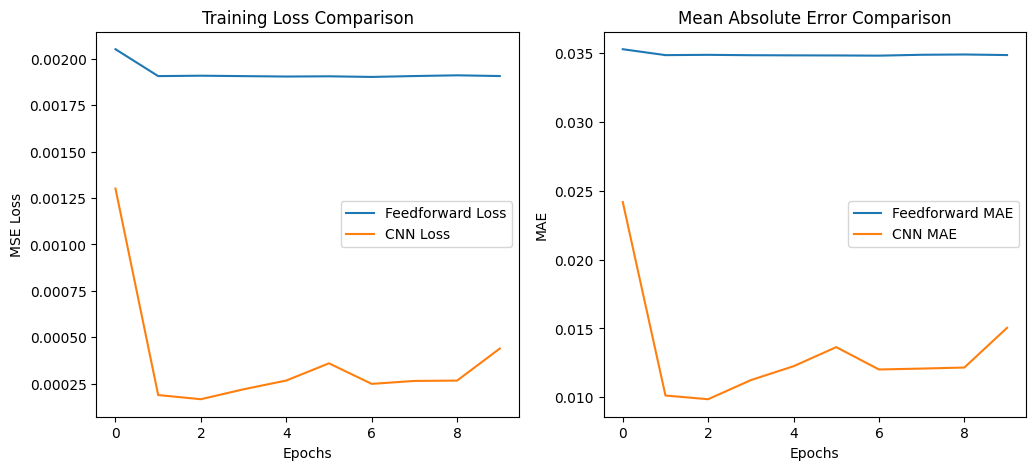

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train = np.mean(X_train, axis=(1, 2))  
y_test = np.mean(X_test, axis=(1, 2))  
X_train_CNN = np.expand_dims(X_train, axis=-1)  
X_test_CNN = np.expand_dims(X_test, axis=-1)
X_train_FF = X_train.reshape((X_train.shape[0], -1))  
X_test_FF = X_test.reshape((X_test.shape[0], -1))
ff_model = keras.Sequential([
    keras.Input(shape=(784,)),  
    layers.Dense(2, activation="relu"),  
    layers.Dense(1)  
])
ff_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                 loss="mean_squared_error",
                 metrics=["mae"])
cnn_inputs = keras.Input(shape=(28, 28, 1))
conv_layer = layers.Conv2D(filters=1, kernel_size=(3, 3), activation="relu")(cnn_inputs)
flatten_layer = layers.Flatten()(conv_layer)
cnn_outputs = layers.Dense(1)(flatten_layer) 
cnn_model = keras.Model(inputs=cnn_inputs, outputs=cnn_outputs)

cnn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss="mean_squared_error",
                  metrics=["mae"])
ff_history = ff_model.fit(X_train_FF, y_train, epochs=10, validation_data=(X_test_FF, y_test))
cnn_history = cnn_model.fit(X_train_CNN, y_train, epochs=10, validation_data=(X_test_CNN, y_test))
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(ff_history.history["loss"], label="Feedforward Loss")
ax[0].plot(cnn_history.history["loss"], label="CNN Loss")
ax[0].set_title("Training Loss Comparison")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("MSE Loss")
ax[0].legend()
ax[1].plot(ff_history.history["mae"], label="Feedforward MAE")
ax[1].plot(cnn_history.history["mae"], label="CNN MAE")
ax[1].set_title("Mean Absolute Error Comparison")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("MAE")
ax[1].legend()
plt.show()